# Data-Driven Brand Mastery: EABL's Social Analytics


## Business Overview
media for brand monitoring to enhance brand perception and customer engagement.
East African Breweries Limited (EABL) is a leading Fast-Moving Consumer Goods (FMCG) company operating in the beverage industry.
EABL's market footprint extends across East Africa, with a significant presence in countries such as Kenya, Uganda, Tanzania, Rwanda, and South Sudan.
With a diverse portfolio of brands such as Tusker Lager, Pilsner Lager, WhiteCap Lager,  Johnnie Walker, Smirnoff, Gilbey's Gin, Richot Brandy, Bond 7 Whiskey and Baileys Irish Cream.
As part of its strategic approach, EABL is keen on leveraging social 

##  Problem Statement
EABL recognizes the need to closely monitor and understand the sentiments expressed on social media platforms regarding its brands, products, and marketing initiatives. The company aims to address the following challenges:

#### 1. Brand Perception and Engagement: 

The current state of public sentiment towards EABL on social media is not well-understood, and the company lacks insights to proactively manage and improve its brand perception.

#### 2. Marketing Campaign Effectiveness: 

EABL needs to evaluate the impact of its marketing campaigns and promotions on social media to optimize strategies and refine future campaigns.

#### 3. Customer Feedback Analysis: 

There is a lack of systematic analysis of customer feedback related to product quality, packaging, pricing, and overall satisfaction. EABL aims to utilize this feedback for continuous product improvement and innovation.

## Objectives

### Main Objectives

#### Enhance Brand Perception and Customer Engagement:

The main objective of our project is to monitor and analyze social media conversations to understand public sentiment towards EABL brands.
Identifying areas for improvement and take proactive measures to enhance overall brand perception.

### Specific Objectives

#### Brand Sentiment Analysis:

Analyze sentiments expressed by consumers regarding EABL products, marketing campaigns, and brand image.

Categorize sentiments as positive, negative, or neutral to derive actionable insights.

#### Campaign Effectiveness:

Evaluate the effectiveness of marketing campaigns and promotions through public reactions on social media.

Measure key performance indicators (KPIs) such as engagement rates, reach, and sentiment shift during and after campaigns.

#### Customer Feedback Analysis:

Capture and analyze customer feedback on specific EABL products.

Extract insights on taste, packaging, pricing, and overall satisfaction to guide product development and enhancement.

######  Success Criteria

The success of this project will be measured by:

1. A notable improvement in overall brand sentiment scores over a defined period.

2. Positive shifts in sentiment during and after key marketing campaigns.

3. Tangible product improvements based on customer feedback.

4. Enhanced online visibility and engagement compared to competitors.

Stakeholders
Marketing Team:

Benefit from insights to optimize marketing strategies and refine campaigns.
Product Development Team:

Utilize feedback for continuous product improvement and innovation.
Executive Leadership:

Receive regular reports on brand health and public perception for strategic decision-making. Objectives


## Stakeholders

#### 1. Marketing Team:

Benefit from insights to optimize marketing strategies and refine campaigns.

#### 2. Product Development Team:

Utilize feedback for continuous product improvement and innovation.

#### 3. Executive Leadership:

Receive regular reports on brand health and public perception for strategic decision-making. 

## Data Understanding

#### 1. Brand Mentions:

Social media posts, comments, and mentions related to EABL and its brands.

Data sources: Twitter, Facebook, Instagram (Likes, shares, comments, EABL relevant hashtags.)


#### Product Feedback:

Comments and discussions regarding specific EABL products.

#### Data sources: 

Social media platforms, review sites, online forums.

Data on taste, packaging, pricing, and overall satisfaction.

#### Campaign Reactions:

Public reactions to EABL's marketing campaigns and promotions.

Data sources: Social media platforms.

#### Event Participation:

Social media mentions related to EABL-sponsored events and promotions.

#### Customer Service Interactions:

Social media interactions with EABL's official customer service handles.

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from  nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
import re
from sklearn. feature_extraction. text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline

import string
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing Datasets

In [2]:
# reading the datasets
Eabl_mentions = pd.read_csv("FinalMentions.CSV")
Eabl_hashtags = pd.read_csv("FinalHashtags.CSV")
Eabl_brands = pd.read_csv("eablProducts.csv")
Google_news = pd.read_csv("FinalGoogleNews.csv")
Chrome_Gin = pd.read_csv("ChromeGin.CSV")

##### MERGING DATAFRAMES

In [3]:
# Combining  the DataFrames vertically to form one df
combined_df = pd.concat([Eabl_mentions, Eabl_hashtags, Eabl_brands, Chrome_Gin], ignore_index=True)
combined_df.head()

,Unnamed: 0,cleaned_text,sentiment,stats,comments,retweets,quotes,likes
0,0,guys do you remember shaffie weru dj joe mfalm...,Negative,"Jan 7, 2024 · 4:59 AM UTC",14,40,1,157
1,1,drilling water at kenneth matiba hospital make...,Positive,"Jan 9, 2024 · 5:13 PM UTC",18,29,1,194
2,2,kenyans wakitambua hii beer it is over for eabl,Neutral,"Jan 9, 2024 · 1:45 PM UTC",33,122,2,537
3,3,i thought eabl products are unwanted around th...,Neutral,"Jan 10, 2024 · 2:43 PM UTC",0,0,0,0
4,4,NaN,Neutral,"Jan 10, 2024 · 2:39 PM UTC",0,0,0,1


In [4]:
#combined_df.to_csv("CombinedFinal.csv")

## 1. DATA CLEANING

In [5]:
print(f"Our Final Combined data has {combined_df.shape[0]} rows & {combined_df.shape[1]} columns.")

Our Final Combined data has 125218 rows & 8 columns.


In [6]:
#dropping the Unnamed: 0 column
combined_df = combined_df.drop('Unnamed: 0',axis=1)

In [7]:
combined_df.columns

Index(['cleaned_text', 'sentiment', 'stats', 'comments', 'retweets', 'quotes',
       'likes'],
      dtype='object')

##### 1. Missing values

In [8]:
# Checking for missing values in each column
missing_values = combined_df.isna().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"The {column} column has {count} missing values")

The cleaned_text column has 4724 missing values
The sentiment column has 4 missing values
The stats column has 2 missing values


In [9]:
# Calculating percentage of missing values in each column
missing_percentage = combined_df.isna().mean() * 100

missing_percentage = missing_percentage[missing_percentage > 0]

# A DataFrame with columns and percentage of missing values
missing_table = pd.DataFrame({
    'Columns': missing_percentage.index,
    '% of Missing Values': missing_percentage.values
})
print("Percentage of Missing Values")
missing_table

Percentage of Missing Values


,Columns,% of Missing Values
0,cleaned_text,3.772621
1,sentiment,0.003194
2,stats,0.001597


In [10]:
# Drop rows with NaN values in the 'cleaned_text', 'sentiment','stats columns
combined_df = combined_df.dropna(subset=['cleaned_text','sentiment','stats'])
combined_df.shape

(120490, 7)

#####  2. Duplicates

In [11]:
# checking for dupliacated rows in the df
duplicated_rows = combined_df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 54707 duplicated rows.


In [12]:
# Calculate the percentage of missing values for each column
missing_percentages1 = (combined_df.isnull().sum() / len(combined_df)) * 100

# Print the result
print("Percentage of missing values in each column:")
print(missing_percentages1)

Percentage of missing values in each column:
cleaned_text    0.0
sentiment       0.0
stats           0.0
comments        0.0
retweets        0.0
quotes          0.0
likes           0.0
dtype: float64


In [13]:
#dropping all the duplicates
combined_df = combined_df.drop_duplicates()

In [14]:
duplicated_rows = combined_df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


#####  3. Correcting Data Types

In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65783 entries, 0 to 125217
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned_text  65783 non-null  object
 1   sentiment     65783 non-null  object
 2   stats         65783 non-null  object
 3   comments      65783 non-null  int64 
 4   retweets      65783 non-null  int64 
 5   quotes        65783 non-null  int64 
 6   likes         65783 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 4.0+ MB


#####  4. Outliers

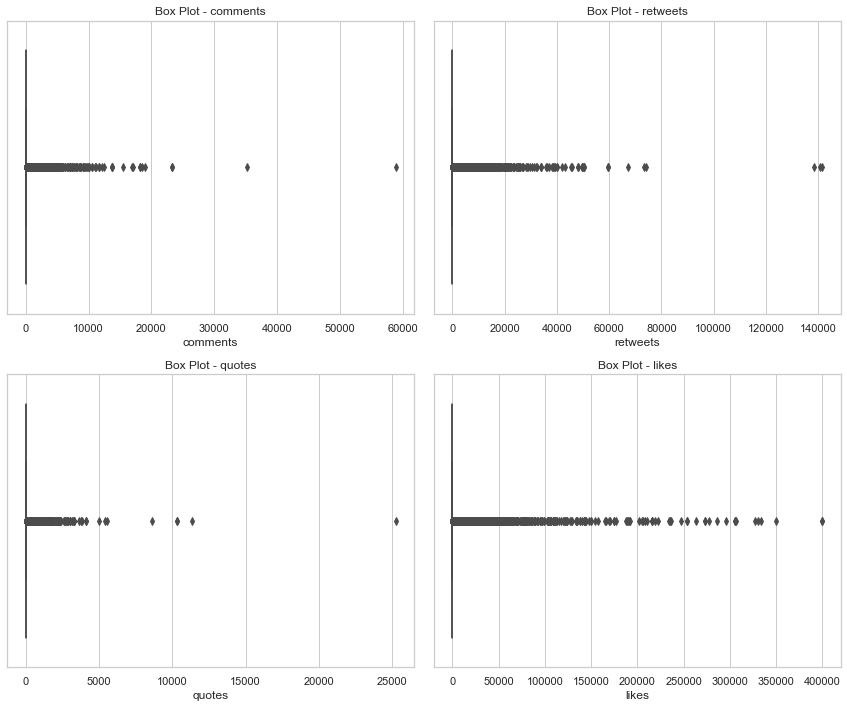

In [16]:
# style for seaborn
sns.set(style="whitegrid")

# columns to check for outliers
columns_to_check = ['comments', 'retweets', 'quotes', 'likes']

# subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot box plots for each column
for i, column in enumerate(columns_to_check):
    sns.boxplot(x=combined_df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

##### 5. Removing Uncessary Text

In [17]:
def clean_text(text):
    # Removing any unnecessary characters, symbols, or special characters
    cleaned_text = ' '.join(e for e in str(text).split() if (e.isalnum() or e.isspace()))
    # Converting all the text to lowercase
    cleaned_text = cleaned_text.lower()
    # Removing extra whitespaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Applying the cleaning function to the 'cleaned_text' column
combined_df['cleaned_text'] = combined_df['cleaned_text'].apply(clean_text)

## 2. FEATURE ENGINEERING

In [18]:
combined_df.head(5)

,cleaned_text,sentiment,stats,comments,retweets,quotes,likes
0,guys do you remember shaffie weru dj joe mfalm...,Negative,"Jan 7, 2024 · 4:59 AM UTC",14,40,1,157
1,drilling water at kenneth matiba hospital make...,Positive,"Jan 9, 2024 · 5:13 PM UTC",18,29,1,194
2,kenyans wakitambua hii beer it is over for eabl,Neutral,"Jan 9, 2024 · 1:45 PM UTC",33,122,2,537
3,i thought eabl products are unwanted around th...,Neutral,"Jan 10, 2024 · 2:43 PM UTC",0,0,0,0
6,unajua sai amafanya eabl anaweza tupea a years...,Neutral,"Jan 10, 2024 · 10:12 AM UTC",1,0,0,0


##### 1. Length of the text

In [19]:
# Calculating  the number of words in the 'cleaned_text' column
combined_df['text_length_words'] = combined_df['cleaned_text'].apply(lambda x: len(str(x).split()))

combined_df[['cleaned_text', 'text_length_words']].head()

,cleaned_text,text_length_words
0,guys do you remember shaffie weru dj joe mfalm...,45
1,drilling water at kenneth matiba hospital make...,28
2,kenyans wakitambua hii beer it is over for eabl,9
3,i thought eabl products are unwanted around th...,9
6,unajua sai amafanya eabl anaweza tupea a years...,19


In [20]:
print(f"The Maximum number of words is {combined_df['text_length_words'].max()} & The Minimum number of words is {combined_df['text_length_words'].min()}")

The Maximum number of words is 879 & The Minimum number of words is 0


##### 2. Datetime Features

In [21]:
# Converting 'stats' column to datetime format
combined_df['stats'] = pd.to_datetime(combined_df['stats'], format='%b %d, %Y · %I:%M %p UTC', errors='coerce')

# Extracting datetime features
combined_df['day'] = combined_df['stats'].dt.day
combined_df['month'] = combined_df['stats'].dt.month
combined_df['year'] = combined_df['stats'].dt.year
combined_df['hour'] = combined_df['stats'].dt.hour
combined_df['day_of_week'] = combined_df['stats'].dt.dayofweek

combined_df[['stats', 'day', 'month', 'year', 'hour','day_of_week']].head()


,stats,day,month,year,hour,day_of_week
0,2024-01-07 04:59:00,7.0,1.0,2024.0,4.0,6.0
1,2024-01-09 17:13:00,9.0,1.0,2024.0,17.0,1.0
2,2024-01-09 13:45:00,9.0,1.0,2024.0,13.0,1.0
3,2024-01-10 14:43:00,10.0,1.0,2024.0,14.0,2.0
6,2024-01-10 10:12:00,10.0,1.0,2024.0,10.0,2.0


In [22]:
# Converting 'day_of_week' to text
day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
combined_df['day_of_week_text'] = combined_df['day_of_week'].map(day_of_week_mapping)

# Converting 'month' to text
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
combined_df['month_text'] = combined_df['month'].map(month_mapping)

combined_df[['stats', 'day', 'month', 'year', 'hour','day_of_week_text', 'month_text']].head()

,stats,day,month,year,hour,day_of_week_text,month_text
0,2024-01-07 04:59:00,7.0,1.0,2024.0,4.0,Sunday,January
1,2024-01-09 17:13:00,9.0,1.0,2024.0,17.0,Tuesday,January
2,2024-01-09 13:45:00,9.0,1.0,2024.0,13.0,Tuesday,January
3,2024-01-10 14:43:00,10.0,1.0,2024.0,14.0,Wednesday,January
6,2024-01-10 10:12:00,10.0,1.0,2024.0,10.0,Wednesday,January


##### 3. Total Engagement

In [23]:
# calculating the total number of engagement in each post
combined_df['total_engagement'] = combined_df['comments'] + combined_df['retweets'] + combined_df['quotes'] + combined_df['likes']

In [24]:
# # Define the keywords
# keywords = ['Chrome', 'Oktoberfest', 'Gilbeys']

# # Create columns for each keyword
# for keyword in keywords:
#     combined_df[f'mentions_{keyword.lower()}'] = combined_df['cleaned_text'].str.contains(keyword, case=False)

# # Convert the boolean values to 1 for True and 0 for False
# for keyword in keywords:
#     combined_df[f'mentions_{keyword.lower()}'] = combined_df[f'mentions_{keyword.lower()}'].astype(int)

##### 4. Total Engagement

In [25]:
# A function to classify weekdays and weekends
def classify_weekday_weekend(day_of_week):
    if day_of_week < 5:  # Monday to Friday (0 to 4)
        return 'Weekday'
    else:  # Saturday and Sunday (5 and 6)
        return 'Weekend'

# Apply the function to create a new 'weekday_or_weekend' column
combined_df['weekday_or_weekend'] = combined_df['day_of_week'].apply(classify_weekday_weekend)

In [26]:
combined_df.columns

Index(['cleaned_text', 'sentiment', 'stats', 'comments', 'retweets', 'quotes',
       'likes', 'text_length_words', 'day', 'month', 'year', 'hour',
       'day_of_week', 'day_of_week_text', 'month_text', 'total_engagement',
       'weekday_or_weekend'],
      dtype='object')

In [27]:
#dropping irrelevant columns
combined_df = combined_df.drop(['stats','day_of_week','month'],axis=1)

In [28]:
# Renaming the columns
combined_df = combined_df.rename(columns={
    'cleaned_text': 'text',
    'text_length_words': 'length',
    'day': 'day(month)',
    'day_of_week_text': 'day(week)',
    'month_text': 'month',
    'weekday_or_weekend': 'weekday/end'
})

# Display the DataFrame with the renamed columns
combined_df.head()

,text,sentiment,comments,retweets,quotes,likes,length,day(month),year,hour,day(week),month,total_engagement,weekday/end
0,guys do you remember shaffie weru dj joe mfalm...,Negative,14,40,1,157,45,7.0,2024.0,4.0,Sunday,January,212,Weekend
1,drilling water at kenneth matiba hospital make...,Positive,18,29,1,194,28,9.0,2024.0,17.0,Tuesday,January,242,Weekday
2,kenyans wakitambua hii beer it is over for eabl,Neutral,33,122,2,537,9,9.0,2024.0,13.0,Tuesday,January,694,Weekday
3,i thought eabl products are unwanted around th...,Neutral,0,0,0,0,9,10.0,2024.0,14.0,Wednesday,January,0,Weekday
6,unajua sai amafanya eabl anaweza tupea a years...,Neutral,1,0,0,0,19,10.0,2024.0,10.0,Wednesday,January,1,Weekday


## 3. EXPLORATORY DATA ANALYSIS

In [29]:
#Checking the summary of the combined data_set before embarking on the EDA
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65783 entries, 0 to 125217
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              65783 non-null  object 
 1   sentiment         65783 non-null  object 
 2   comments          65783 non-null  int64  
 3   retweets          65783 non-null  int64  
 4   quotes            65783 non-null  int64  
 5   likes             65783 non-null  int64  
 6   length            65783 non-null  int64  
 7   day(month)        65514 non-null  float64
 8   year              65514 non-null  float64
 9   hour              65514 non-null  float64
 10  day(week)         65514 non-null  object 
 11  month             65514 non-null  object 
 12  total_engagement  65783 non-null  int64  
 13  weekday/end       65783 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 7.5+ MB


In [40]:
combined_df['text'][10]

'talk to eabl mchukuwe tusker fc change the name to tusker meru fc and have them play at kinoru stadium'

In [31]:
from nltk.tokenize import word_tokenize

# Convert non-string values to string
combined_df['text'] = combined_df['text'].astype(str)

# Applying tokenization using nltk's word_tokenize
combined_df['tokenized_text'] = combined_df['text'].apply(word_tokenize)

# Convert each word in the tokenized text to lowercase
combined_df['tokenized_text'] = combined_df['tokenized_text'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha()])

# Removing stop words
stop_words = set(stopwords.words('english'))
combined_df['filtered_text'] = combined_df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Display the DataFrame
print(combined_df)


                                                     text sentiment  comments  \
0       guys do you remember shaffie weru dj joe mfalm...  Negative        14   
1       drilling water at kenneth matiba hospital make...  Positive        18   
2         kenyans wakitambua hii beer it is over for eabl   Neutral        33   
3       i thought eabl products are unwanted around th...   Neutral         0   
6       unajua sai amafanya eabl anaweza tupea a years...   Neutral         1   
...                                                   ...       ...       ...   
125213  alcohol should not be sold to people under the...   Neutral         0   
125214  these drinks deserve to be in the front seat a...  Positive         0   
125215               get a 750ml at just ksh600 chromegin   Neutral         0   
125216                                enjoyment chromegin   Neutral         1   
125217  zinapiga boomerang tu hapa zikingoja maji iche...   Neutral         0   

        retweets  quotes  l

neutral     28668
positive    18354
negative     6763
Neutral      5259
Positive     5218
Negative     1521
Name: sentiment, dtype: int64


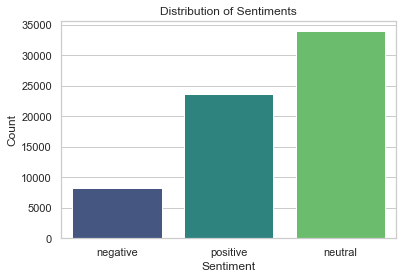

In [32]:
#Checking the distibution of the sentiments
sentiment_distribution = combined_df['sentiment'].value_counts()
print(sentiment_distribution)
#Converting the sentiments to lowercase:
combined_df['sentiment'] = combined_df['sentiment'].str.lower()

#Plotting a count plot graph for distribution of sentiments:
sns.countplot(data=combined_df, x='sentiment', palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()
